In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from schemamatching.graph_generation import *

In [3]:
xml_file_path = 'data/countries_1.xml'

In [4]:
with open(xml_file_path) as xml_file:
    xml_string = xml_file.read()
xml_string[:100]

'<items><item><name>Aruba,Aruba,Aruba,Aruba,Aruba,Aruba</name><tld>.aw</tld><cca2>AW</cca2><ccn3>533.'

In [5]:
def display_graph(G):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
#     edge_labels = { (u, v): d['type'] for (u, v, d) in G.edges(data=True)}
    edge_labels = nx.get_edge_attributes(G, name='type')
    nx.draw_networkx(G)
    pos = nx.spring_layout(G)
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

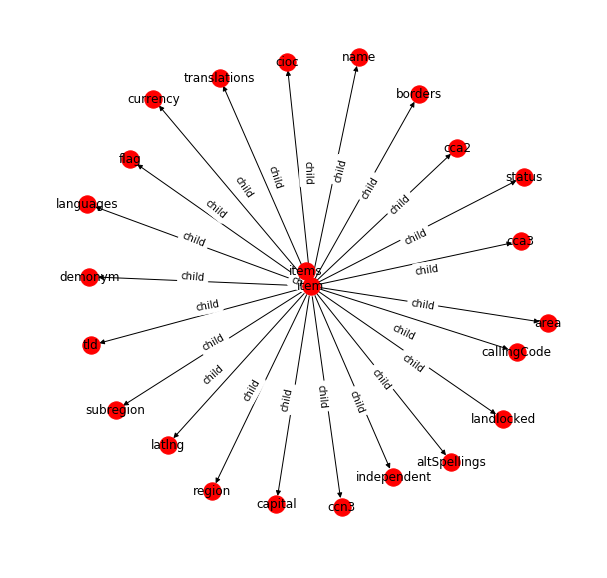

In [6]:
G = generate_graph(xml_string)
display_graph(G)

In [7]:
G.nodes

NodeView(('items', 'item', 'name', 'tld', 'cca2', 'ccn3', 'cca3', 'cioc', 'independent', 'status', 'currency', 'callingCode', 'capital', 'altSpellings', 'region', 'subregion', 'languages', 'translations', 'latlng', 'demonym', 'landlocked', 'borders', 'area', 'flag'))

In [8]:
G.edges

OutEdgeView([('items', 'item'), ('item', 'name'), ('item', 'tld'), ('item', 'cca2'), ('item', 'ccn3'), ('item', 'cca3'), ('item', 'cioc'), ('item', 'independent'), ('item', 'status'), ('item', 'currency'), ('item', 'callingCode'), ('item', 'capital'), ('item', 'altSpellings'), ('item', 'region'), ('item', 'subregion'), ('item', 'languages'), ('item', 'translations'), ('item', 'latlng'), ('item', 'demonym'), ('item', 'landlocked'), ('item', 'borders'), ('item', 'area'), ('item', 'flag')])

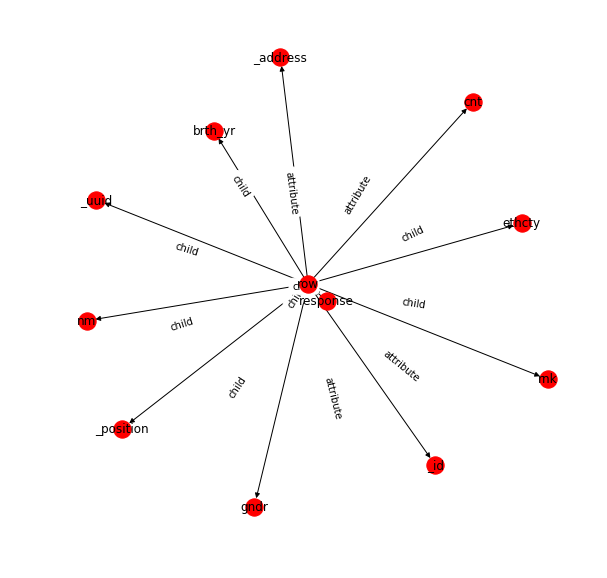

In [9]:
with open('Data/babyNames.xml') as xml_file:
    xml_string = xml_file.read()
G = generate_graph(xml_string)
display_graph(G)

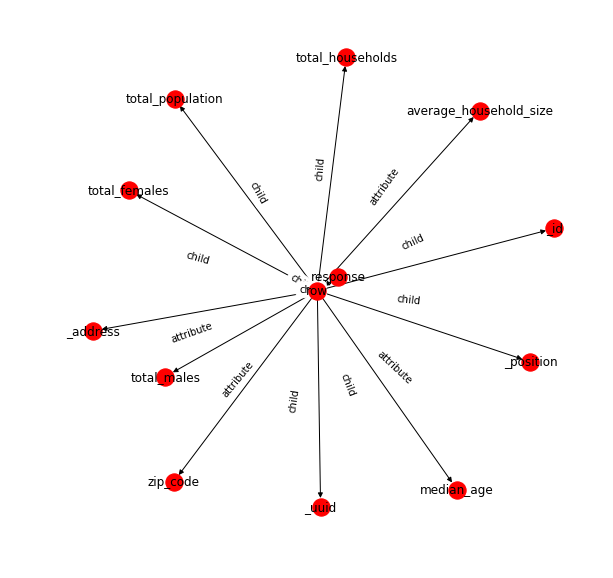

In [10]:
with open('Data/Cencus.xml') as xml_file:
    xml_string = xml_file.read()
G = generate_graph(xml_string)
display_graph(G)

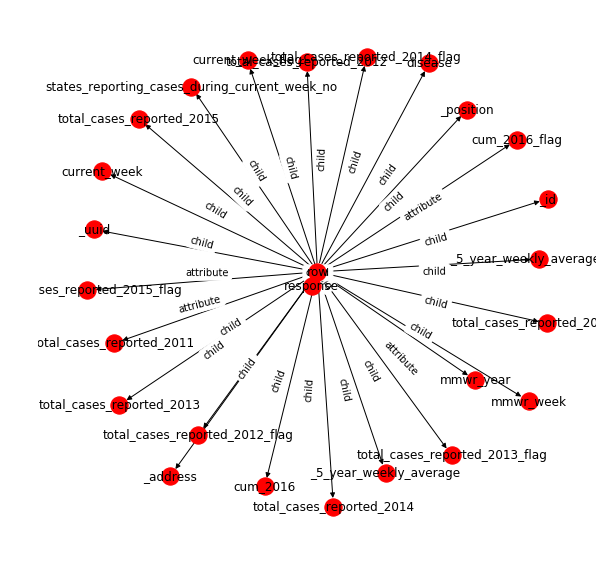

In [11]:
with open('Data/disease.xml') as xml_file:
    xml_string = xml_file.read()
G = generate_graph(xml_string)
display_graph(G)

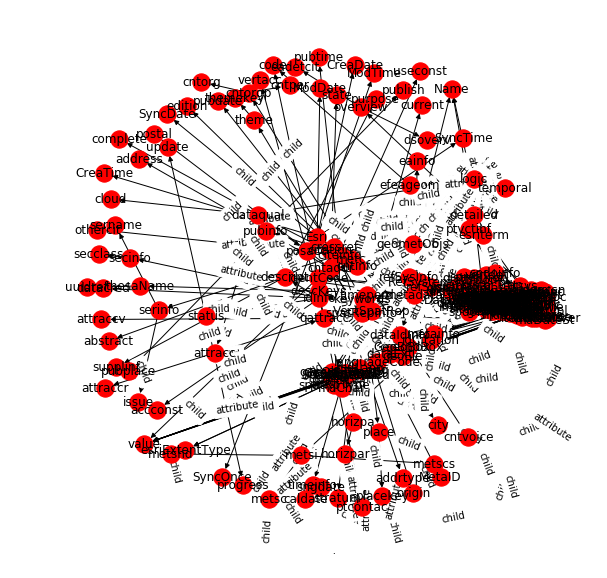

In [12]:
with open('Data/flood zones.xml') as xml_file:
    xml_string = xml_file.read()
G = generate_graph(xml_string)
display_graph(G)

# Pairwise graphs

In [13]:
A = nx.DiGraph()
B = nx.DiGraph()
A.add_edge('a', 'a1', type='l1')
A.add_edge('a', 'a2', type='l1')
A.add_edge('a1', 'a2', type='l2')
B.add_edge('b', 'b1', type='l1')
B.add_edge('b', 'b2', type='l2')
B.add_edge('b2', 'b1', type='l2')

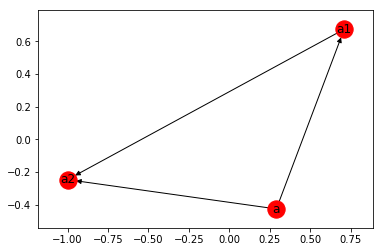

In [14]:
nx.draw_networkx(A)

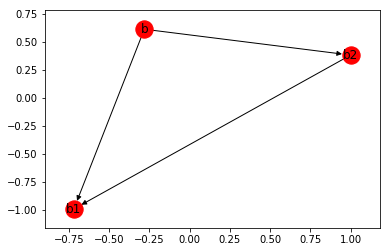

In [15]:
nx.draw_networkx(B)

In [16]:
def display_pairsiwe_graphs(G):
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G, name='weight')
    node_labels = nx.get_node_attributes(G, name='score')
    nx.draw_networkx(G, pos)
    nx.draw_networkx_edge_labels(G, pos, edge_labels)
    nx.draw_networkx_labels(G, pos, node_labels)

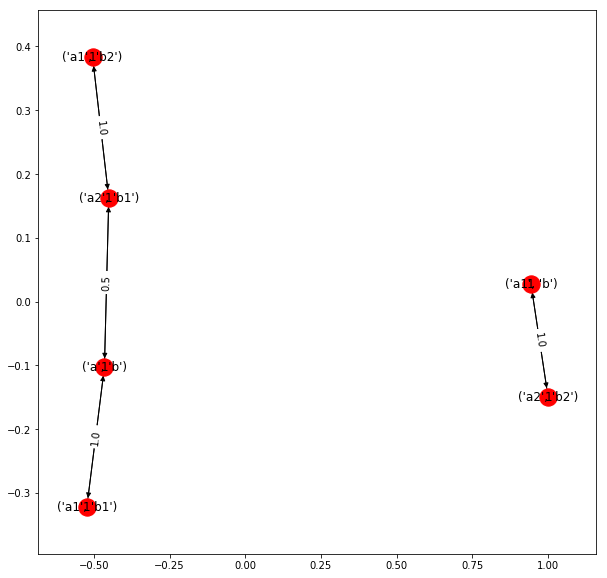

In [17]:
AB = generate_pairwise_graph(A, B)
display_pairsiwe_graphs(AB)

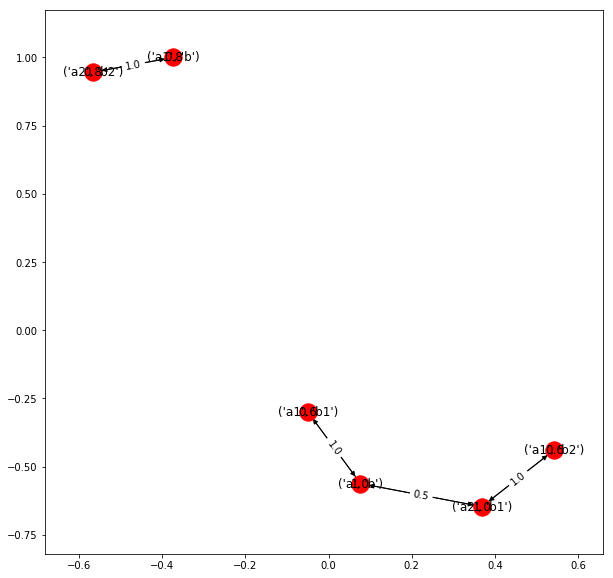

In [18]:
AB2 = do_one_interation_of_flooding(AB)
display_pairsiwe_graphs(AB2)